## Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

# part 1

## Get the data

In [2]:
df = pd.read_csv('GooglePlay.csv')
# print(df)
# df_test = pd.read_csv('heart_attack_prediction_dataset.csv')
# list(df['Last Update'].value_counts().keys())
# df.loc[:,'Category']
list(df['Category'].value_counts().keys())
# l = []
# for i in df['Genres'].value_counts().keys():
#     l+= i.split(';')
# set(l)
# df[df['Content Rating'] == 'Adults only 18+']
# df['Installs'].value_counts()
# df.iloc[100:160]
# df


['FAMILY',
 'GAME',
 'TOOLS',
 'MEDICAL',
 'BUSINESS',
 'PRODUCTIVITY',
 'PERSONALIZATION',
 'COMMUNICATION',
 'SPORTS',
 'LIFESTYLE',
 'FINANCE',
 'HEALTH_AND_FITNESS',
 'PHOTOGRAPHY',
 'SOCIAL',
 'NEWS_AND_MAGAZINES',
 'SHOPPING',
 'TRAVEL_AND_LOCAL',
 'DATING',
 'BOOKS_AND_REFERENCE',
 'VIDEO_PLAYERS',
 'EDUCATION',
 'ENTERTAINMENT',
 'MAPS_AND_NAVIGATION',
 'FOOD_AND_DRINK',
 'HOUSE_AND_HOME',
 'AUTO_AND_VEHICLES',
 'LIBRARIES_AND_DEMO',
 'WEATHER',
 'ART_AND_DESIGN',
 'EVENTS',
 'PARENTING',
 'COMICS',
 'BEAUTY']

In [3]:
df.loc[:,'Category']


0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10835                 FAMILY
10836                 FAMILY
10837                MEDICAL
10838    BOOKS_AND_REFERENCE
10839              LIFESTYLE
Name: Category, Length: 10840, dtype: object

## Get All data

In [4]:
df1 = pd.read_csv('source_Playstore_final.csv')
df1.iloc[100:160]

C:\Users\ewint\AppData\Local\Temp\ipykernel_15328\3981746737.py:1: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('source_Playstore_final.csv')


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
100,"Baby Games - Piano, Baby Phone, First Words",com.rvappstudios.baby.games.piano.phone.kids,Educational,4.323487,13842.0,"10,000,000+",10000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,"Math Kids - Add, Subtract, Count, and Learn",com.rvappstudios.math.kids.counting,Educational,4.211431,19680.0,"10,000,000+",10000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,ABC Kids - Tracing & Phonics,com.rvappstudios.abc_kids_toddler_tracing_phonics,Educational,4.283004,62518.0,"10,000,000+",10000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Colors & Shapes - Kids Learn Color and Shape,com.rvappstudios.shapes.colors.toddler,Educational,4.403691,8573.0,"5,000,000+",5000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Magnifying Glass + Flashlight,com.rvappstudios.magnifyingglass,Lifestyle,4.565137,69983.0,"5,000,000+",5000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Puzzle Kids - Animals Shapes and Jigsaw Puzzles,com.rvappstudios.jigsaw.puzzles.kids,Educational,4.197051,14797.0,"10,000,000+",10000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Find The Differences - Spot it,com.rvappstudios.puzzle.game.find.difference.ftd,Puzzle,4.311912,31627.0,"5,000,000+",5000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,ABC Spelling - Spell & Phonics,com.rvappstudios.abc.spelling.toddler.spell.ph...,Educational,4.523342,7994.0,"1,000,000+",1000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Sight Words - PreK to 3rd Grade Sight Word Games,com.rvappstudios.sight.words.phonics.reading.k...,Educational,4.271028,1048.0,"500,000+",500000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Kiddopia: Preschool Education & ABC Games for ...,com.paperboatapps.google.kiddopia,Educational,4.170507,6385.0,"1,000,000+",1000000.0,True,0.00,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## prepare numerical data

In [5]:
# get numerical columns
columns = df.columns
numerical_columns = {"Rating": df['Rating'],
                     "Reviews": df['Reviews'],
                     "Size": df['Size'],
                     "Installs": df['Installs'],
                     "Price": df['Price']}
# we will extract the numbers and store the cleaned data in the dict below
cleaned_numerical_columns = {}
# drop missing data = NoN rows
for col in numerical_columns.keys():
    numerical_columns[col].dropna(inplace=True)

## check what is the structure of data in each column

In [6]:
for col_name in numerical_columns.keys():
    data_without_digits = np.array([])
    for data in numerical_columns[col_name]:
        data_without_digits = np.append(data_without_digits, re.sub(r'\d+', '', str(data)))

    # save each structure once
    data_without_digits = np.unique(data_without_digits)
    print(f"column <{col_name}>, extera characters:", data_without_digits, end='\n')

column <Rating>, extera characters: ['.']
column <Reviews>, extera characters: ['']
column <Size>, extera characters: ['.M' '.k' 'M' 'Varies with device' 'k']
column <Installs>, extera characters: ['' '+' ',+' ',,+' ',,,+']
column <Price>, extera characters: ['' '$. ']


## Add 'Rating' and 'Review' columns in cleaned_numerical_columns, because they're already clean

In [7]:
cleaned_numerical_columns['Rating'] = numerical_columns['Rating']
cleaned_numerical_columns['Reviews'] = numerical_columns['Reviews']

## 'Size' column: Remove not numerical data

In [8]:
pattern = r'^\d+(\.\d+)?[Mk]$'
for index, data in enumerate(numerical_columns['Size']):
    if not (re.match(pattern, data)):
        numerical_columns['Size'].drop(index, inplace=True)

## 'Size' column: Extract numbers from combined data

In [9]:
def convert_to_integer(data):
    if data.endswith('M'):
        return int(float(data[:-1]) * 1e6)  # Convert M to millions
    elif data.endswith('k'):
        return int(float(data[:-1]) * 1e3)  # Convert k to thousands
    else:
        return int(data)

# convert combined data into integer
cleaned_numerical_columns['Size'] = numerical_columns['Size'].apply(convert_to_integer)

## 'Installs' column: remove extra characters like ',' and '+'

In [10]:
cleaned_numerical_columns['Installs'] = numerical_columns['Installs'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

## 'Price' column: remove $

In [11]:
cleaned_numerical_columns['Price'] = numerical_columns['Price'].apply(lambda x: float(x.replace('$', '')))

## analyse columns

In [12]:
# create a dict to store mean, max,... values for each attr
analyse_attrs = {key: [] for key in cleaned_numerical_columns.keys()}

for key in cleaned_numerical_columns.keys():
    # get the data of a column/attr
    data = cleaned_numerical_columns[key]
    attr_name = key
    attr_type = type(data[0])
    value_range = (data.min(), data.max())
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    mode_val = data.mode()[0]
    median_val = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)].tolist()
    analyse_attrs[key] = [attr_name, attr_type, value_range, min_val, max_val, mean_val, mode_val, median_val, outliers]

In [13]:
# save the result dataframe
labels = ['attr_name', 'attr_type', 'value_range', 'min_val', 'max_val', 'mean_val', 'mode_val', 'median_val', 'outliers']
analyse_attrs = pd.DataFrame(analyse_attrs, index=labels)
analyse_attrs.T.to_csv('part1_analyse_attrs.csv', index=False)
analyse_attrs.T

,attr_name,attr_type,value_range,min_val,max_val,mean_val,mode_val,median_val,outliers
Rating,Rating,<class 'numpy.float64'>,"(1.0, 5.0)",1.0,5.0,4.191757,4.4,4.3,"[3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, ..."
Reviews,Reviews,<class 'numpy.int64'>,"(0, 78158306)",0,78158306,444152.896033,0,2094.0,"[215644, 194216, 224399, 295221, 174531, 27192..."
Size,Size,<class 'numpy.int64'>,"(8500, 100000000)",8500,100000000,21516529.515582,11000000,13000000.0,"[73000000, 77000000, 70000000, 77000000, 84000..."
Installs,Installs,<class 'numpy.int64'>,"(0, 1000000000)",0,1000000000,15464338.882565,1000000,100000.0,"[50000000, 100000000, 100000000, 1000000000, 5..."
Price,Price,<class 'numpy.float64'>,"(0.0, 400.0)",0.0,400.0,1.027368,0.0,0.0,"[4.99, 4.99, 4.99, 4.99, 3.99, 3.99, 6.99, 1.4..."


## BoxPlot for outliers

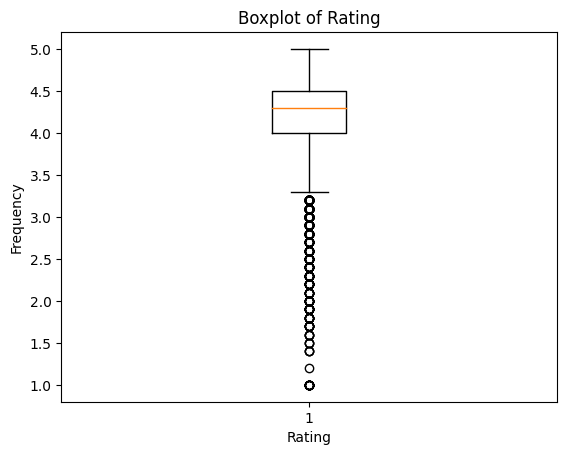

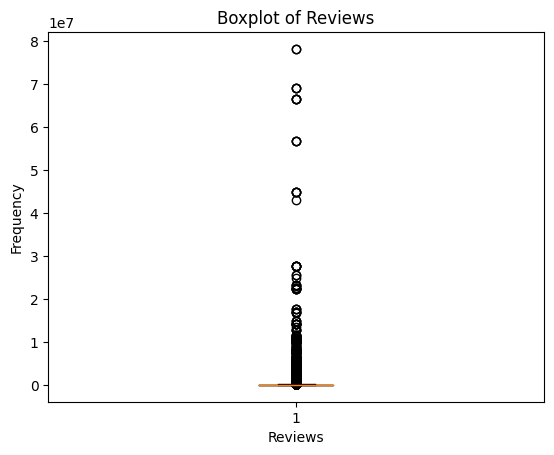

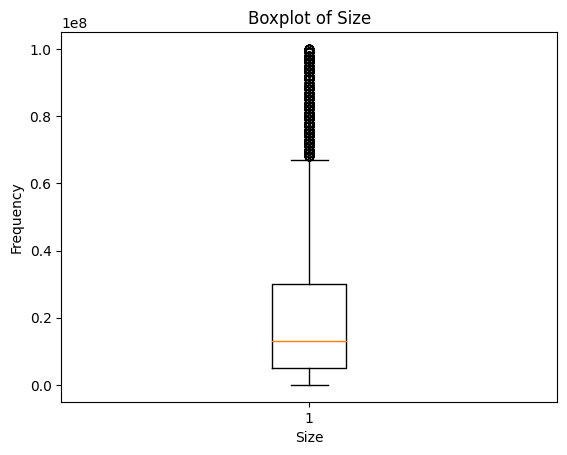

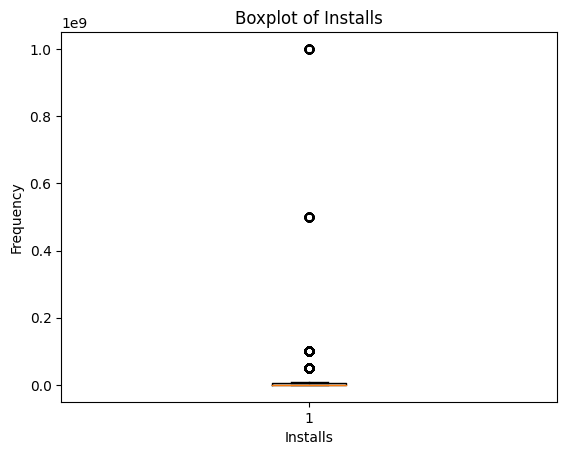

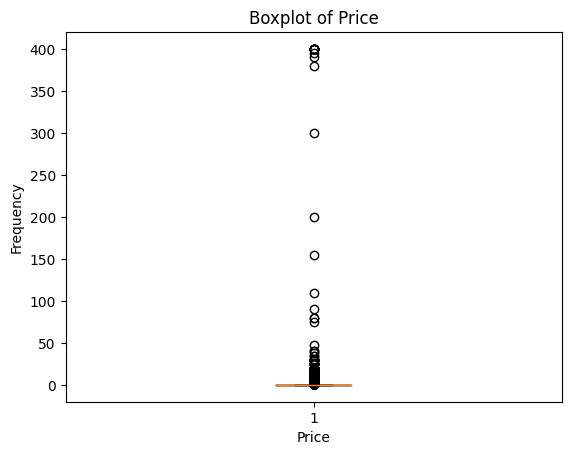

In [14]:
# Check if the directory 'boxPlots' exists, and create it if it doesn't
directory = 'part1_boxPlots'
if not os.path.exists(directory):
    os.makedirs(directory)
# make boxPlots
for key in cleaned_numerical_columns.keys():
    # get a column of data
    data = cleaned_numerical_columns[key]
    # create boxplot
    plt.boxplot(data)
    # Add labels and title
    plt.xlabel(key)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {key}')
    plt.savefig(f'part1_boxPlots/boxplot_{key}.png')
    plt.show()

In [15]:
quality_table = pd.DataFrame(index=list(df.columns), columns=["No.records", "No.Null", "Accuracy", "Completeness", "Validity", "Currentness", "Consistency"])
columns_to_check = df.columns

## Number of record 

In [16]:
for column in columns_to_check:
  quality_table['No.records'][column] = len(df)

## Missing value

In [17]:
missing_values = {}
for column in columns_to_check:
    missing_values[column] = df[df[column].isna()]

## Valid value

In [18]:
def pattern_validation(inp, pattern):
  return inp.str.match(pattern)
def boundary_validation(inp, start, end):
  return ((inp >= start) & (inp <= end))
def isin_validation(inp, range):
  return inp.isin(range)

df['Current Ver'] = df['Current Ver'].astype(str)
df['Android Ver'] = df['Android Ver'].astype(str)
invalid_values = {}
for column in columns_to_check:
  if column=='Category':
    invalid_values[column] = df[~isin_validation(df['Category'],['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS','PRODUCTIVITY','PERSONALIZATION','COMMUNICATION','SPORTS','LIFESTYLE','FINANCE','HEALTH_AND_FITNESS','PHOTOGRAPHY','SOCIAL','NEWS_AND_MAGAZINES','SHOPPING','TRAVEL_AND_LOCAL','DATING','BOOKS_AND_REFERENCE','VIDEO_PLAYERS','EDUCATION','ENTERTAINMENT','MAPS_AND_NAVIGATION','FOOD_AND_DRINK','HOUSE_AND_HOME','AUTO_AND_VEHICLES','LIBRARIES_AND_DEMO','WEATHER','ART_AND_DESIGN','EVENTS','PARENTING','COMICS','BEAUTY'])]
  elif column == 'Rating':
    invalid_values[column] = df[~boundary_validation(df['Rating'],0,5)]
  elif column == 'Reviews':
    invalid_values[column] = df[~boundary_validation(df['Reviews'],0,np.inf)]
  elif column == 'Size':
    invalid_values[column] = df[~pattern_validation(df['Size'],'[0-9]')]
  elif column == 'Content Rating':
    invalid_values[column] = df[~isin_validation(df['Content Rating'],['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'])]
  elif column == 'Genres':
    invalid_values[column] = df[~pattern_validation(df['Genres'],'^[\w\s&;]+$')]
  elif column == 'Last Updated':
    invalid_values[column] = df[~pattern_validation(df['Last Updated'],'[0-9]{2}-[A-Z][a-z]{2}-[0-9]{2}')]
  elif column == 'Current Ver':
    invalid_values[column] = df[~pattern_validation(df['Current Ver'],'^\d+(\.\d+)*$')]
  elif column == 'Android Ver':
    invalid_values[column] = df[~pattern_validation(df['Android Ver'], '^\d+(\.\d+)*\s?[-_]\s?\d+(\.\d+)*\s?(?:and up)?$')]
  elif column == 'Type':
    invalid_values[column] = df[~isin_validation(df['Type'],['Free','Paid'])]
  elif column == 'Installs':
    invalid_values[column] = df[~pattern_validation(df['Installs'],'^\d+(,\d+)*\+$')]
  elif column == 'Price':
    invalid_values[column] = df[~pattern_validation(df['Price'],'^\$?\d+(\.\d+)?$|^0$')]
invalid_values['Rating']
# for column, values in invalid_values.items():
#     print(f"Invalid values for column '{column}':")
#     print(values)





,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,07-Mar-18,1.0.0,4.1 and up
113,113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,08-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10824,10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,02-Feb-18,1,4.0 and up
10830,10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10834,10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


## Number of Nulls

In [19]:
for column in columns_to_check:
  quality_table['No.Null'][column] = df[column].isnull().sum()

## Validity

In [20]:
dlen = len(df)

for item in invalid_values:
  quality_table['Validity'][item] = (1-(len(invalid_values[item].index)/dlen)) *100

quality_table

,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Unnamed: 0,10840,0,NaN,NaN,NaN,NaN,NaN
App,10840,0,NaN,NaN,NaN,NaN,NaN
Category,10840,0,NaN,NaN,100.0,NaN,NaN
Rating,10840,1474,NaN,NaN,86.402214,NaN,NaN
Reviews,10840,0,NaN,NaN,100.0,NaN,NaN
Size,10840,0,NaN,NaN,84.363469,NaN,NaN
Installs,10840,0,NaN,NaN,99.990775,NaN,NaN
Type,10840,1,NaN,NaN,99.990775,NaN,NaN
Price,10840,0,NaN,NaN,92.619926,NaN,NaN
Content Rating,10840,0,NaN,NaN,100.0,NaN,NaN


## Completeness

In [21]:
# completeness
for item in missing_values:
  quality_table['Completeness'][item] = (1-(missing_values[item].size/dlen))*100

quality_table


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Unnamed: 0,10840,0,NaN,100.0,NaN,NaN,NaN
App,10840,0,NaN,100.0,NaN,NaN,NaN
Category,10840,0,NaN,100.0,100.0,NaN,NaN
Rating,10840,1474,NaN,-90.369004,86.402214,NaN,NaN
Reviews,10840,0,NaN,100.0,100.0,NaN,NaN
Size,10840,0,NaN,100.0,84.363469,NaN,NaN
Installs,10840,0,NaN,100.0,99.990775,NaN,NaN
Type,10840,1,NaN,99.870849,99.990775,NaN,NaN
Price,10840,0,NaN,100.0,92.619926,NaN,NaN
Content Rating,10840,0,NaN,100.0,100.0,NaN,NaN


## Accuracy

In [22]:
dlen = len(df)
for column in columns_to_check:
    if column in missing_values and column in invalid_values:
        accuracy = (1 - (missing_values[column].size + len(invalid_values[column].index) / dlen)) * 100
        quality_table['Accuracy'][column] = accuracy
    else:
        quality_table['Accuracy'][column] = 100.0  # Assuming completeness if data is not missing or invalid

quality_table


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Unnamed: 0,10840,0,100.0,100.0,NaN,NaN,NaN
App,10840,0,100.0,100.0,NaN,NaN,NaN
Category,10840,0,100.0,100.0,100.0,NaN,NaN
Rating,10840,1474,-2063513.597786,-90.369004,86.402214,NaN,NaN
Reviews,10840,0,100.0,100.0,100.0,NaN,NaN
Size,10840,0,84.363469,100.0,84.363469,NaN,NaN
Installs,10840,0,99.990775,100.0,99.990775,NaN,NaN
Type,10840,1,-1300.009225,99.870849,99.990775,NaN,NaN
Price,10840,0,92.619926,100.0,92.619926,NaN,NaN
Content Rating,10840,0,100.0,100.0,100.0,NaN,NaN


## Currentness

In [23]:
for column in columns_to_check:
  quality_table['Currentness'][column] = 1

quality_table

,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Unnamed: 0,10840,0,100.0,100.0,NaN,1,NaN
App,10840,0,100.0,100.0,NaN,1,NaN
Category,10840,0,100.0,100.0,100.0,1,NaN
Rating,10840,1474,-2063513.597786,-90.369004,86.402214,1,NaN
Reviews,10840,0,100.0,100.0,100.0,1,NaN
Size,10840,0,84.363469,100.0,84.363469,1,NaN
Installs,10840,0,99.990775,100.0,99.990775,1,NaN
Type,10840,1,-1300.009225,99.870849,99.990775,1,NaN
Price,10840,0,92.619926,100.0,92.619926,1,NaN
Content Rating,10840,0,100.0,100.0,100.0,1,NaN


## Consistency between Category and Genres

In [24]:
# Check consistency between Category and Genres
inconsistent_categories = df[df.apply(lambda x: x['Category'] not in x['Genres'], axis=1)]
inconsistent_categories

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Consistency between Rating and Reviews

In [25]:
# Check consistency between Rating and Reviews
inconsistent_rating_reviews = df[df['Rating'] > df['Reviews']]
inconsistent_rating_reviews

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
481,481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100+,Paid,$7.99,Mature 17+,Dating,21-Jan-17,1.0.1,4.0 and up
615,615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,24-Jul-18,2.2.9,4.4 and up
619,619,Random Chat App with Strangers,DATING,3.0,2,16M,100+,Free,0,Mature 17+,Dating,17-Jul-18,2.5,4.0.3 and up
645,645,UK Girls Mobile Numbers,DATING,3.0,1,5.5M,500+,Free,0,Mature 17+,Dating,19-Jul-18,1,4.0.3 and up
654,654,Speeding Joyride & Car Meet App,DATING,5.0,3,25M,100+,Free,0,Mature 17+,Dating,20-Jul-18,1.2.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Everyone,Arcade,03-Mar-17,1,2.3 and up
10736,10737,FP Legacy,MAPS_AND_NAVIGATION,4.0,3,44M,"1,000+",Free,0,Everyone,Maps & Navigation,02-Jul-18,3.4.0,4.0 and up
10775,10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,05-Mar-18,2,2.3 and up
10804,10805,Scoreboard FR,LIFESTYLE,4.3,3,15M,100+,Free,0,Everyone,Lifestyle,07-Aug-18,2.1,4.2 and up


## Consistency between Android Ver and Current Ver

In [26]:
# Check consistency between Android Ver and Current Ver
inconsistent_android_version = df[df.apply(lambda x: str(x['Android Ver']) not in str(x['Current Ver']), axis=1)]
inconsistent_android_version

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10834,10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up


## schema level

In [27]:
inconsistent_price = df[(df['Type'] == 'FREE') & (df['Price'] == 0)]
inconsistent_price

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
inconsistent_price = df[(df['Type'] == 'Paid') & (df['Price'] == 0)]
inconsistent_price

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
# Define a function to perform the required transformations
def transform_genre(genre):
    return genre.replace('&', 'AND').replace(' ', '_').upper()

# Apply the transformation function to the 'Genres' column and save into another list
transformed_genres = df['Genres'].apply(transform_genre).tolist()
inconsistent_genres = df[~df['Category'].isin(transformed_genres)]
inconsistent_genres



,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1654,1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
1655,1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,05-Jul-18,1.129.0.2,4.1 and up
1656,1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,01-Aug-18,2.137.0,4.1 and up
1657,1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,17-Jul-18,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,22-Apr-18,1,4.0.3 and up
10826,10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,13-Jun-18,2.0.20,4.0.3 and up
10833,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up


In [30]:
# from fuzzywuzzy import fuzz
# # Function to calculate similarity using Levenshtein distance
# def levenshtein_similarity(str1, str2):
#     return fuzz.ratio(str1.lower(), str2.lower())

# # Set a threshold for similarity score
# threshold = 90  # You can adjust this threshold as needed

# # Create a list to store potential duplicate pairs
# duplicate_pairs = []

# # Iterate through the DataFrame to compare pairs of records
# for i in range(len(df)):
#     for j in range(i + 1, len(df)):
#         record1 = df.loc[i, 'App']
#         record2 = df.loc[j, 'App']
#         similarity_score = levenshtein_similarity(record1, record2)
#         if similarity_score >= threshold:
#             duplicate_pairs.append((record1, record2, similarity_score))

# # Display potential duplicate pairs
# for pair in duplicate_pairs:
#     print(f"Potential duplicate pair: {pair}")

c:\Users\ewint\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

### misspelling in data

In [39]:
import enchant

spell_check_dict = enchant.Dict("en_US")

mask = []
for data in df["Genres"]:
    data = data.replace('&', '').replace(';', ' ')
    words_of_data = data.split()
    for word in words_of_data:
        if not spell_check_dict.check(word):
            mask.append(True)
            break
        else:
            mask.append(False)
            break

misspellings = df[mask]
misspellings

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
